In [1]:
%cd ..

C:\cygwin64\home\evger\thesis


In [3]:
import numpy as np
import pandas as pd

from hft.utils import logger
logger.to_file = True
logger.fmt_string = "%(message)s"


from hft.backtesting import backtest
from hft.backtesting.output import StorageOutput
from hft.utils.consts import QuoteSides
from hft.backtesting.readers import OrderbookReader, TimeLimitedReader
from hft.backtesting.strategy import CalmStrategy
from hft.units.metrics.instant import VWAP_volume, HayashiYoshido, CraftyCorrelation
from hft.units.metrics.composite import Lipton
from hft.utils.data import OrderBook
from hft.units.filters import Filters
from hft.utils.types import DepleshionReplenishmentSide

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from tqdm import tqdm

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [106]:
secs = 720
bucket_size = 5
lipton_levels=8
hym = HayashiYoshido(secs, True)
crafty = CraftyCorrelation(secs, bucket_size, 'crafty')
lipton= Lipton(crafty.name, lipton_levels)
# lipton2= Lipton(crafty.name, lipton_levels)

In [107]:
hy_values = []
deltas = []
lipton_v = []
crafty_values = []
def store_only_yoshido(labels, ts, object):
  if 'hayashi-yoshido' == labels[0]: #  *list(hym._integral_sum[DepleshionReplenishmentSide.BID_ASK][labels[1]].values())
    hy_values.append((ts, labels[1], *object))
  elif 'crafty' == labels[0]:
    crafty_values.append((ts, labels[1], *object))
  elif 'delta' in labels and hym.filter(object):
    deltas.append((ts, object, labels[-1]))
  elif 'lipton' in labels: 
    if object is not None:
        lipton_v.append((ts, labels[-2], *object))



In [108]:
reader = TimeLimitedReader(snapshot_file='tests/resources/huge_dataset/orderbook_10_03_20.csv.gz', skip_time='20 min', limit_time='40 min')

hy_values = []
simulation = CalmStrategy(filter_depth=5, delta_metrics=[hym, crafty], composite_metrics=[lipton])
storage = StorageOutput(instant_metric_names=[hym.name], time_metric_names=[])
storage.consume = store_only_yoshido

backtester = backtest.Backtest(reader, simulation, storage)
backtester.run(tqdm_enabled=True)


Current time: 2020-03-10 18:47:00.984000:   8%|▊         | 13019/171773 [00:08<01:37, 1621.57it/s]


Current time: 2020-03-10 18:48:25.766000:  14%|█▍        | 24276/171773 [00:17<01:51, 1327.54it/s]


Current time: 2020-03-10 18:50:22.144000:  21%|██        | 35966/171773 [00:25<01:35, 1427.76it/s]


Current time: 2020-03-10 18:52:56.994000:  27%|██▋       | 46763/171773 [00:35<01:47, 1159.71it/s]


Current time: 2020-03-10 18:54:47.718000:  34%|███▍      | 58213/171773 [00:43<01:12, 1568.50it/s]


Current time: 2020-03-10 18:57:42.634000:  41%|████      | 70177/171773 [00:53<02:07, 796.93it/s]


Current time: 2020-03-10 19:00:20.051000:  48%|████▊     | 82592/171773 [01:01<00:58, 1531.51it/s]


Current time: 2020-03-10 19:01:53.283000:  56%|█████▌    | 96348/171773 [01:09<00:49, 1520.22it/s]


Current time: 2020-03-10 19:04:34.131000:  63%|██████▎   | 108964/171773 [01:18<01:01, 1014.59it/s]


Current time: 2020-03-10 19:05:40.752000:  69%|██████▉   | 119043/171773 [01:27<00:40, 1291.71it/s]


Current time: 2020-03-10 19:07:59.954000:  76%|███████▌  | 130572/171773 [01:36<00:39, 1051.33it/s]


Current time: 2020-03-10 19:11:28.141000:  83%|████████▎ | 142134/171773 [01:44<00:22, 1289.35it/s]


Current time: 2020-03-10 19:14:13.298000:  89%|████████▊ | 152086/171773 [01:53<00:28, 679.88it/s] 


Current time: 2020-03-10 19:16:27.676000:  95%|█████████▌| 163641/171773 [02:02<00:06, 1240.23it/s]


Current time: 2020-03-10 19:17:36.892000: 100%|█████████▉| 171570/171773 [02:08<00:00, 1217.21it/s]
Current time: 2020-03-10 19:17:36.892000: : 171774it [02:08, 1337.37it/s]                          

Current time: 2020-03-10 19:17:50.149000:   5%|▌         | 2414/44701 [00:02<00:56, 753.26it/s]


Current time: 2020-03-10 19:20:52.897000:  33%|███▎      | 14545/44701 [00:11<00:18, 1608.57it/s]


Current time: 2020-03-10 19:22:50.730000:  63%|██████▎   | 28338/44701 [00:20<00:09, 1781.48it/s]


Current time: 2020-03-10 19:24:08.792000:  93%|█████████▎| 41486/44701 [00:29<00:02, 1331.44it/s]


Current time: 2020-03-10 19:24:33.789000: 100%|█████████▉| 44480/44701 [00:31<00:00, 1577.21it/s]
Current time: 2020-03-10 19:24:33.789000: : 44703it [00:31, 1424.43it/s]                         


In [109]:
hy = pd.DataFrame(hy_values, columns=['date', 'symbol', 'hy', 'dr-side'])
hy.index = pd.DatetimeIndex(pd.to_datetime(hy.date))
hy.tail()

,date,symbol,hy,dr-side
date,,,,
2020-03-10 19:25:10.882,2020-03-10 19:25:10.882,XBTUSD,0.010254,1
2020-03-10 19:25:10.884,2020-03-10 19:25:10.884,XBTUSD,0.010251,1
2020-03-10 19:25:10.889,2020-03-10 19:25:10.889,ETHUSD,0.114729,2
2020-03-10 19:25:10.899,2020-03-10 19:25:10.899,XBTUSD,0.010247,1
2020-03-10 19:25:10.900,2020-03-10 19:25:10.900,XBTUSD,0.010243,1


In [110]:
craft = pd.DataFrame(crafty_values, columns=['date', 'symbol', 'corr_', 'dr-side'])
craft.index = pd.DatetimeIndex(pd.to_datetime(craft.date))
craft.dropna(inplace=True)
craft.tail()

,date,symbol,corr_,dr-side
date,,,,
2020-03-10 19:25:10.882,2020-03-10 19:25:10.882,XBTUSD,0.036157,1
2020-03-10 19:25:10.884,2020-03-10 19:25:10.884,XBTUSD,0.036157,1
2020-03-10 19:25:10.889,2020-03-10 19:25:10.889,ETHUSD,0.109453,2
2020-03-10 19:25:10.899,2020-03-10 19:25:10.899,XBTUSD,0.036157,1
2020-03-10 19:25:10.900,2020-03-10 19:25:10.900,XBTUSD,0.036157,1


In [111]:
# # df_deltas = pd.DataFrame(deltas, columns=['date', ''])
# ts, dlts, lbl = zip(*deltas)
# dlts = list(map(lambda x: np.sum(x[-1][1, :]), dlts))
# dlt_df = pd.DataFrame(zip(ts, dlts, lbl), columns=['date', 'delta', 'label'])
# dlt_df.index = pd.DatetimeIndex(pd.to_datetime(dlt_df.date))
# dlt_df.head()

In [112]:
lipton_df = pd.DataFrame(lipton_v, columns=['date', 'label', 'prob', 'prob-down'])
lipton_df.index = pd.DatetimeIndex(pd.to_datetime(lipton_df.date))
lipton_df.tail()

,date,label,prob,prob-down
date,,,,
2020-03-10 19:25:10.882,2020-03-10 19:25:10.882,XBTUSD,0.885481,0.886214
2020-03-10 19:25:10.884,2020-03-10 19:25:10.884,XBTUSD,0.885481,0.886214
2020-03-10 19:25:10.889,2020-03-10 19:25:10.889,ETHUSD,0.366926,0.373280
2020-03-10 19:25:10.899,2020-03-10 19:25:10.899,XBTUSD,0.880377,0.881129
2020-03-10 19:25:10.900,2020-03-10 19:25:10.900,XBTUSD,0.880377,0.881129


In [113]:
snapshots = reader._snapshots_df
snapshots = snapshots[[2, 3, 13, 23, 33]]
snapshots.columns = ['symbol', 'ask_price', 'ask_volume', 'bid_price', 'bid_volume']
snapshots.tail()

,symbol,ask_price,ask_volume,bid_price,bid_volume
0,,,,,
2020-03-10 19:25:10.894,XBTUSD,7912.50,260826,7912.0,1379936
2020-03-10 19:25:10.899,XBTUSD,7912.50,260951,7912.0,1379936
2020-03-10 19:25:10.900,XBTUSD,7912.50,261117,7912.0,1379936
2020-03-10 19:25:10.915,XBTUSD,7912.50,261117,7912.0,1379936
2020-03-10 19:25:10.954,ETHUSD,200.75,38235,200.7,55552


In [114]:
symbol = 'XBTUSD'

xbt_snap = snapshots[snapshots.symbol == symbol]
xbt_hy = hy[hy.symbol == symbol]
# xbt_delta = dlt_df[dlt_df.label == symbol]
xbt_lipton = lipton_df[lipton_df.label == symbol]
xbt_craft = craft[craft.symbol == symbol]

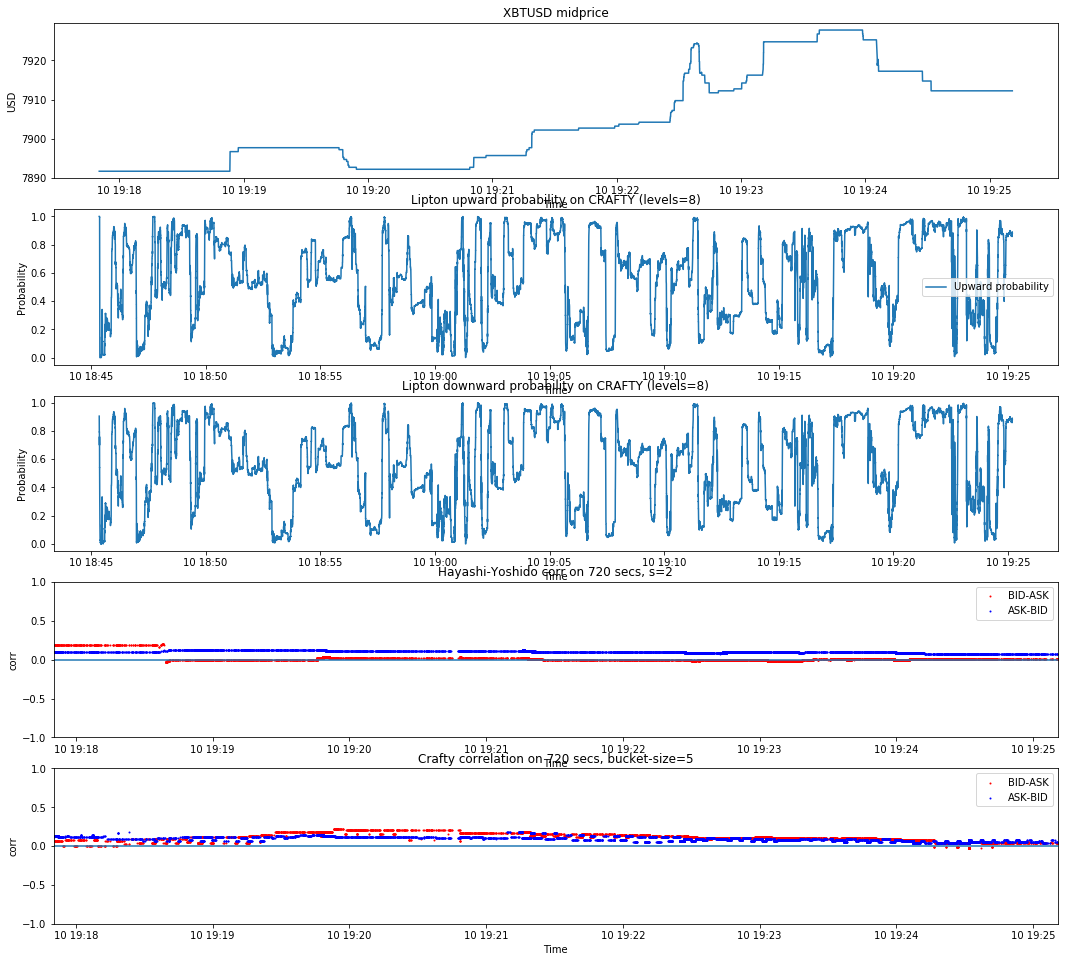

In [115]:
f = plt.figure(figsize=(18, 20))
prices = f.add_subplot(611)
prob = f.add_subplot(612)
prob2 = f.add_subplot(613)


vol = f.add_subplot(614)
_craft = f.add_subplot(615)
# bars = f.add_subplot(616)

_min = xbt_snap.index.min()
_max = xbt_snap.index.max()

prices.plot(xbt_snap.index, (xbt_snap.ask_price + xbt_snap.bid_price) / 2, label='prices')
prices.set(title=f'{symbol} midprice', xlabel='Time', ylabel='USD')

prob.plot(xbt_lipton.date, xbt_lipton['prob'], label='Upward probability')
prob2.plot(xbt_lipton.date, xbt_lipton['prob-down'], label='Downward probability')

prob.set(title=f'Lipton upward probability on CRAFTY (levels={lipton_levels})', xlabel='Time', ylabel='Probability')
prob2.set(title=f'Lipton downward probability on CRAFTY (levels={lipton_levels})', xlabel='Time', ylabel='Probability')

prob.legend()


for s, c, l in zip([1, 2], ['r','b'], ['BID-ASK', 'ASK-BID']):
    _hy = xbt_hy[xbt_hy['dr-side'] == s]
    vol.scatter(_hy.date, _hy.hy, s=1, color=c, label=l)
    vol.set_xlim([_min, _max])
    vol.set_ylim([-1.0, 1.0])

for s, c, l in zip([1, 2], ['r','b'], ['BID-ASK', 'ASK-BID']):
    cr = xbt_craft[xbt_craft['dr-side'] == s]
    _craft.scatter(cr.date, cr.corr_, s=1, color=c, label=l)
    _craft.set_xlim([_min, _max])
    _craft.set_ylim([-1.0, 1.0])

vol.set(title=f'Hayashi-Yoshido corr on {secs} secs, s={s}', xlabel='Time', ylabel='corr')
vol.plot([_min, _max], [0, 0])
vol.legend()

_craft.set(title=f'Crafty correlation on {secs} secs, bucket-size={bucket_size}', xlabel='Time', ylabel='corr')
_craft.plot([_min, _max], [0, 0])
_craft.legend()


# bars.scatter(dlt_df[dlt_df.delta > 0].date, dlt_df[dlt_df.delta > 0].delta, color='g', s=1, label='Replenishment ask Q')
# bars.scatter(dlt_df[dlt_df.delta < 0].date, dlt_df[dlt_df.delta < 0].delta, color='r', s=1, label='Deplenishment bid Q')
# bars.set_xlim([_min, _max])
# bars.set_ylim([-30000, 30000])
# bars.set(title='Deltas visualized', xlabel='Time', ylabel='Size')
# bars.legend()
# plt.colorbar()
plt.show()

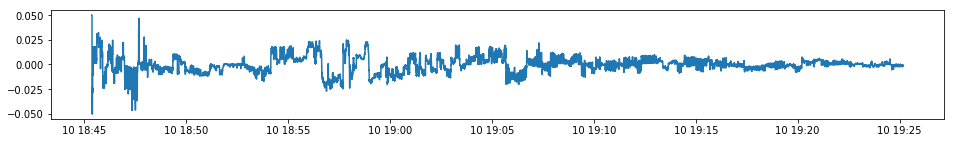

In [116]:
plt.figure(figsize=(16,2))
y = xbt_lipton['prob'] - xbt_lipton['prob-down']
plt.plot(xbt_lipton.date, np.clip(y, -0.05, 0.05))

In [83]:
hym._integral_sum

{<DepleshionReplenishmentSide.BID_ASK: 1>: defaultdict(<function hft.units.metrics.instant.HayashiYoshido.__init__.<locals>.<dictcomp>.<lambda>>,
             {'ETHUSD': {False: 5067.430333333397, True: 4796.684408333377},
              'XBTUSD': {False: 14762.608291666813,
               True: 10521.807658333333}}),
 <DepleshionReplenishmentSide.ASK_BID: 2>: defaultdict(<function hft.units.metrics.instant.HayashiYoshido.__init__.<locals>.<dictcomp>.<lambda>>,
             {'ETHUSD': {False: 5055.705866666672, True: 6280.98375},
              'XBTUSD': {False: 16221.095791666483,
               True: 11464.513108333422}})}